In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel("bank_customer_credit_data_50 (1).xlsx")
df.sample(10)

,Customer_ID,Age,Gender,Marital_Status,Dependents,Residence_Years,Education_Level,Employment_Status,Job_Type,Monthly_Income,Experience_Years,Loan_Purpose,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Checking_Account_Status,Savings_Account_Status,Property,Housing,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Insurance_Coverage,Financial_Literacy_Score,Region,Employment_Industry,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score,Credit_Risk
40,C041,59,Female,Divorced,0,1,Graduate,Salaried,Clerk,39540,22,Education,108396,322428,765460,32.88,Medium,Poor,No,No,>100K,>200K,Real Estate,Rent,No,21,56,24265,Yes,Yes,1,643586,395141,5,Basic,Medium,North,Other,0,2.74,19.36,0.61,47,Bad
45,C046,29,Male,Single,3,1,PhD,Salaried,Teacher,192049,24,Personal,129065,556820,1149188,6.61,Medium,Poor,Yes,No,No account,<50K,Real Estate,Own,No,158,97,43520,Yes,No,0,1486536,125150,5,NaN,Low,North,Finance,300,0.67,5.98,0.08,41,Bad
2,C003,35,Male,Single,3,5,Graduate,Self-employed,Manager,255913,11,Business,69693,975240,623695,13.44,Medium,Good,No,No,<50K,50K–200K,Real Estate,Own,No,223,7,41042,Yes,No,1,608819,96347,4,Comprehensive,Medium,East,Healthcare,0,0.27,2.44,0.16,52,Good
1,C002,49,Female,Married,4,2,Graduate,Salaried,Manager,104740,23,Personal,103092,844070,630466,18.22,Medium,Good,No,No,<50K,<50K,Real Estate,Family,No,173,53,12593,Yes,Yes,0,129083,488533,4,NaN,Medium,North,IT,0,0.98,6.02,3.78,96,Good
33,C034,35,Male,Married,3,10,High School,Salaried,Sales,53049,8,Business,129821,549447,1204146,30.42,Low,Good,No,Yes,50K–100K,NaN,Real Estate,Family,No,44,92,19024,No,No,2,1162864,418219,1,Basic,High,South,Finance,0,2.45,22.70,0.36,41,Bad
4,C005,28,Male,Single,3,10,High School,Salaried,Technician,168877,32,Car,43295,639421,625278,13.80,Medium,Good,No,No,50K–100K,<50K,NaN,Own,Yes,220,18,28376,No,Yes,5,1464821,297632,3,Comprehensive,Low,South,Education,0,0.26,3.70,0.20,41,Good
5,C006,41,Female,Widowed,3,6,PhD,Salaried,Clerk,35237,32,Furniture,28807,373501,1043176,14.62,Medium,Good,No,No,>100K,<50K,Real Estate,Rent,Yes,113,34,44513,Yes,No,6,1950463,336585,4,Basic,Low,East,Other,0,0.82,29.60,0.17,74,Bad
20,C021,50,Female,Single,2,11,Postgraduate,Salaried,Teacher,233861,7,Car,45355,165775,1227354,25.65,Medium,Good,Yes,No,<50K,50K–200K,NaN,Own,No,199,92,27685,Yes,No,3,1094244,312213,3,Basic,Low,South,Other,600,0.19,5.25,0.29,75,Good
37,C038,27,Female,Married,0,7,Postgraduate,Salaried,Manager,226489,17,Education,49620,897048,753286,15.43,High,Good,No,No,<50K,50K–200K,Real Estate,Own,No,226,102,33284,Yes,No,4,342231,319804,2,NaN,Medium,West,Manufacturing,0,0.22,3.33,0.93,60,Good
39,C040,29,Female,Married,0,9,Graduate,Salaried,Technician,221232,23,Car,35559,870184,1772320,29.42,Medium,Average,Yes,No,>100K,>200K,Real Estate,Own,No,190,75,38784,Yes,Yes,3,214053,443002,3,NaN,Low,East,IT,0,0.16,8.01,2.07,77,Good


In [4]:
bank = df.copy()

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  50 non-null     object 
 1   Age                          50 non-null     int64  
 2   Gender                       50 non-null     object 
 3   Marital_Status               50 non-null     object 
 4   Dependents                   50 non-null     int64  
 5   Residence_Years              50 non-null     int64  
 6   Education_Level              50 non-null     object 
 7   Employment_Status            50 non-null     object 
 8   Job_Type                     50 non-null     object 
 9   Monthly_Income               50 non-null     int64  
 10  Experience_Years             50 non-null     int64  
 11  Loan_Purpose                 50 non-null     object 
 12  Monthly_Spending             50 non-null     int64  
 13  Savings_Balance       

In [6]:
null_cols = df.columns[df.isnull().any()]
filtered_df = df[null_cols]
print(filtered_df.sample(10))

   Savings_Account_Status     Property Insurance_Coverage
20               50K–200K          NaN              Basic
44                   <50K          Car                NaN
38                  >200K          Car              Basic
34               50K–200K          Car                NaN
4                    <50K          NaN      Comprehensive
19                   <50K  Real Estate                NaN
30               50K–200K          NaN              Basic
1                    <50K  Real Estate                NaN
41                  >200K  Real Estate                NaN
9                50K–200K          Car      Comprehensive


In [7]:
bank["Savings_Account_Status"].unique()

array([nan, '<50K', '50K–200K', '>200K'], dtype=object)

In [8]:
bank["Property"].unique()

array([nan, 'Real Estate', 'Car'], dtype=object)

In [9]:
bank["Insurance_Coverage"].unique()

array([nan, 'Comprehensive', 'Basic'], dtype=object)

In [10]:
bank["Property"] = bank["Property"].fillna("No").copy()

In [11]:
bank["Insurance_Coverage"] = bank["Insurance_Coverage"].fillna("No").copy()

In [12]:
bank.drop(["Checking_Account_Status", "Savings_Account_Status"], axis=1, inplace=True)

In [13]:
bank_encoded = pd.get_dummies(bank, columns=["Gender", "Marital_Status", "Employment_Status",
                                             "Loan_Purpose", "Property", "Housing", "Region", "Employment_Industry"], drop_first=True)

In [14]:
bank_encoded.head()

,Customer_ID,Age,Dependents,Residence_Years,Education_Level,Job_Type,Monthly_Income,Experience_Years,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Insurance_Coverage,Financial_Literacy_Score,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score,Credit_Risk,Gender_Male,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Furniture,Loan_Purpose_Personal,Property_No,Property_Real Estate,Housing_Own,Housing_Rent,Region_North,Region_South,Region_West,Employment_Industry_Finance,Employment_Industry_Healthcare,Employment_Industry_IT,Employment_Industry_Manufacturing,Employment_Industry_Other
0,C001,59,0,14,High School,Sales,130235,19,34065,264214,448929,31.50,Medium,Good,No,No,No,176,98,35157,Yes,Yes,2,1651405,242997,2,No,Medium,0,0.26,3.45,0.15,97,Good,True,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False
1,C002,49,4,2,Graduate,Manager,104740,23,103092,844070,630466,18.22,Medium,Good,No,No,No,173,53,12593,Yes,Yes,0,129083,488533,4,No,Medium,0,0.98,6.02,3.78,96,Good,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False
2,C003,35,3,5,Graduate,Manager,255913,11,69693,975240,623695,13.44,Medium,Good,No,No,No,223,7,41042,Yes,No,1,608819,96347,4,Comprehensive,Medium,0,0.27,2.44,0.16,52,Good,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
3,C004,63,3,12,High School,Engineer,207247,34,41962,506108,513556,12.18,Medium,Average,Yes,No,Yes,188,49,18320,Yes,Yes,3,1369432,310931,3,No,High,0,0.20,2.48,0.23,64,Good,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,C005,28,3,10,High School,Technician,168877,32,43295,639421,625278,13.80,Medium,Good,No,No,Yes,220,18,28376,No,Yes,5,1464821,297632,3,Comprehensive,Low,0,0.26,3.70,0.20,41,Good,True,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [16]:
ct = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), ["Gender", "Marital_Status", "Employment_Status",
                                             "Loan_Purpose", "Property", "Housing", "Region", "Employment_Industry"])],
    remainder = "passthrough"
)
x_transformed = ct.fit_transform(bank)

In [17]:
x_transformed

array([[0.0, 1.0, 0.0, ..., 0.15, 97, 'Good'],
       [1.0, 0.0, 0.0, ..., 3.78, 96, 'Good'],
       [0.0, 1.0, 0.0, ..., 0.16, 52, 'Good'],
       ...,
       [1.0, 0.0, 0.0, ..., 0.02, 41, 'Bad'],
       [1.0, 0.0, 1.0, ..., 0.24, 77, 'Good'],
       [0.0, 1.0, 0.0, ..., 0.06, 56, 'Good']], dtype=object)

In [18]:
bank.sample(10)

,Customer_ID,Age,Gender,Marital_Status,Dependents,Residence_Years,Education_Level,Employment_Status,Job_Type,Monthly_Income,Experience_Years,Loan_Purpose,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Property,Housing,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Insurance_Coverage,Financial_Literacy_Score,Region,Employment_Industry,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score,Credit_Risk
41,C042,38,Male,Single,2,8,Graduate,Salaried,Technician,46364,31,Education,36732,324187,934574,21.08,Medium,Average,No,No,Real Estate,Family,Yes,189,8,26931,Yes,No,2,1931175,215048,5,No,High,North,Other,0,0.79,20.16,0.11,42,Bad
25,C026,32,Female,Married,1,6,Postgraduate,Self-employed,Sales,221475,33,Personal,54298,369167,856741,33.18,Low,Good,Yes,No,Car,Rent,No,163,65,8287,Yes,Yes,4,1968317,229465,5,No,Medium,East,Manufacturing,0,0.25,3.87,0.12,92,Good
21,C022,58,Male,Single,0,1,Postgraduate,Salaried,Clerk,39435,28,Furniture,159188,14337,1685156,21.80,High,Good,No,No,Real Estate,Own,No,60,72,48319,Yes,Yes,5,828513,314470,2,Comprehensive,Low,West,Finance,0,4.04,42.73,0.38,78,Bad
18,C019,44,Female,Single,0,6,Postgraduate,Salaried,Technician,97215,16,Business,18709,71203,1865790,8.09,Medium,Good,No,No,Real Estate,Family,No,113,19,19850,No,No,2,765472,374899,1,Basic,Medium,West,Finance,600,0.19,19.19,0.49,71,Bad
26,C027,42,Female,Single,3,13,PhD,Self-employed,Teacher,190196,6,Car,95219,351809,319114,36.61,Medium,Good,No,No,No,Own,Yes,18,105,34660,Yes,No,7,438590,50861,5,Comprehensive,Low,West,Education,0,0.50,1.68,0.12,48,Good
34,C035,64,Female,Single,3,3,Graduate,Self-employed,Teacher,240677,23,Personal,51395,502562,320846,24.16,Medium,Average,No,No,Car,Own,No,51,15,47007,Yes,Yes,4,101195,324912,3,No,Medium,West,IT,0,0.21,1.33,3.21,44,Good
7,C008,39,Male,Single,2,4,High School,Unemployed,Engineer,206615,2,Personal,147396,155159,1033049,35.74,Medium,Good,No,No,No,Own,Yes,20,72,16876,No,Yes,4,827147,22431,2,Basic,High,South,Healthcare,0,0.71,5.00,0.03,60,Good
10,C011,31,Female,Married,0,8,Graduate,Salaried,Manager,164415,9,Furniture,41790,929618,1515585,14.40,Medium,Good,No,No,Real Estate,Rent,No,98,41,1726,Yes,Yes,0,1890117,122720,1,Comprehensive,High,North,Other,0,0.25,9.22,0.06,99,Good
33,C034,35,Male,Married,3,10,High School,Salaried,Sales,53049,8,Business,129821,549447,1204146,30.42,Low,Good,No,Yes,Real Estate,Family,No,44,92,19024,No,No,2,1162864,418219,1,Basic,High,South,Finance,0,2.45,22.70,0.36,41,Bad
49,C050,48,Male,Married,2,9,Graduate,Self-employed,Clerk,221962,19,Business,53413,443661,1895924,25.29,High,Average,No,No,Real Estate,Own,No,70,113,34742,Yes,Yes,0,1566111,90827,5,Comprehensive,Low,East,Manufacturing,900,0.24,8.54,0.06,56,Good


In [19]:
bank["Education_Level"].unique()

array(['High School', 'Graduate', 'PhD', 'Postgraduate'], dtype=object)

In [20]:
bank["Job_Type"].unique()

array(['Sales', 'Manager', 'Engineer', 'Technician', 'Clerk', 'Teacher'],
      dtype=object)

In [21]:
bank["Credit_Card_Usage"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [22]:
bank["Payment_History"].unique()

array(['Good', 'Average', 'Poor'], dtype=object)

In [23]:
bank["Other_Loans"].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
bank["Default_History"].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
bank["Foreign_Worker"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
bank["Mobile_Banking_Active"].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
bank["Auto_Pay_Enabled"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
bank["Insurance_Coverage"].unique()

array(['No', 'Comprehensive', 'Basic'], dtype=object)

In [29]:
bank["Financial_Literacy_Score"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [31]:
nominal_cols = ["Gender", "Marital_Status", "Employment_Status", "Loan_Purpose", "Property", "Housing", "Region", "Employment_Industry"]
ordinal_cols = ["Education_Level", "Job_Type", "Credit_Card_Usage", "Payment_History", "Other_Loans",
                "Default_History", "Foreign_Worker", "Mobile_Banking_Active", "Auto_Pay_Enabled", "Insurance_Coverage", "Financial_Literacy_Score"]

In [32]:
ordinal_cat = [
    ['High School', 'Graduate', 'PhD', 'Postgraduate'],
    ['Sales', 'Manager', 'Engineer', 'Technician', 'Clerk', 'Teacher'],
    ['Medium', 'Low', 'High'],
    ['Good', 'Average', 'Poor'],
    ['No', 'Yes'],
    ['No', 'Comprehensive', 'Basic'],
]

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_cat), ordinal_cols),
        ("ohe", OneHotEncoder(drop="first"), nominal_cols)
    ],
    remainder="passthrough"
)

In [34]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [35]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Graduate',
                                                                              'PhD',
                                                                              'Postgraduate'],
                                                                             ['Sales',
                                                                              'Manager',
                                                                              'Engineer',
                                                                              'Technician',
                                                                              'Clerk',
                                                                              'Teacher'],
                                                                             ['Medium',
                                                                              'Low',
                                                                              'High'],
                                                                             ['Good',
                                                                              'Average',
                                                                              'Poor'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Comprehensive',
                                                                              'Basic']]),
                                                  ['Education_Level',
                                                   '...
                                                   'Payment_History',
                                                   'Other_Loans',
                                                   'Default_History',
                                                   'Foreign_Worker',
                                                   'Mobile_Banking_Active',
                                                   'Auto_Pay_Enabled',
                                                   'Insurance_Coverage',
                                                   'Financial_Literacy_Score']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Marital_Status',
                                                   'Employment_Status',
                                                   'Loan_Purpose', 'Property',
                                                   'Housing', 'Region',
                                                   'Employment_Industry'])])),
                ('classifier', RandomForestClassifier())])

In [36]:
bank.head()

,Customer_ID,Age,Gender,Marital_Status,Dependents,Residence_Years,Education_Level,Employment_Status,Job_Type,Monthly_Income,Experience_Years,Loan_Purpose,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Property,Housing,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Insurance_Coverage,Financial_Literacy_Score,Region,Employment_Industry,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score,Credit_Risk
0,C001,59,Male,Single,0,14,High School,Salaried,Sales,130235,19,Car,34065,264214,448929,31.50,Medium,Good,No,No,No,Own,No,176,98,35157,Yes,Yes,2,1651405,242997,2,No,Medium,South,Finance,0,0.26,3.45,0.15,97,Good
1,C002,49,Female,Married,4,2,Graduate,Salaried,Manager,104740,23,Personal,103092,844070,630466,18.22,Medium,Good,No,No,Real Estate,Family,No,173,53,12593,Yes,Yes,0,129083,488533,4,No,Medium,North,IT,0,0.98,6.02,3.78,96,Good
2,C003,35,Male,Single,3,5,Graduate,Self-employed,Manager,255913,11,Business,69693,975240,623695,13.44,Medium,Good,No,No,Real Estate,Own,No,223,7,41042,Yes,No,1,608819,96347,4,Comprehensive,Medium,East,Healthcare,0,0.27,2.44,0.16,52,Good
3,C004,63,Female,Married,3,12,High School,Salaried,Engineer,207247,34,Business,41962,506108,513556,12.18,Medium,Average,Yes,No,No,Family,Yes,188,49,18320,Yes,Yes,3,1369432,310931,3,No,High,East,Manufacturing,0,0.20,2.48,0.23,64,Good
4,C005,28,Male,Single,3,10,High School,Salaried,Technician,168877,32,Car,43295,639421,625278,13.80,Medium,Good,No,No,No,Own,Yes,220,18,28376,No,Yes,5,1464821,297632,3,Comprehensive,Low,South,Education,0,0.26,3.70,0.20,41,Good


In [37]:
sns.set(style="whitegrid", palette="pastel", font_scale=1)
plt.rcParams["figure.figsize"] = (10,6)

In [38]:
df.shape

(50, 44)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  50 non-null     object 
 1   Age                          50 non-null     int64  
 2   Gender                       50 non-null     object 
 3   Marital_Status               50 non-null     object 
 4   Dependents                   50 non-null     int64  
 5   Residence_Years              50 non-null     int64  
 6   Education_Level              50 non-null     object 
 7   Employment_Status            50 non-null     object 
 8   Job_Type                     50 non-null     object 
 9   Monthly_Income               50 non-null     int64  
 10  Experience_Years             50 non-null     int64  
 11  Loan_Purpose                 50 non-null     object 
 12  Monthly_Spending             50 non-null     int64  
 13  Savings_Balance       

In [40]:
df.isnull().sum()

Customer_ID                     0
Age                             0
Gender                          0
Marital_Status                  0
Dependents                      0
Residence_Years                 0
Education_Level                 0
Employment_Status               0
Job_Type                        0
Monthly_Income                  0
Experience_Years                0
Loan_Purpose                    0
Monthly_Spending                0
Savings_Balance                 0
Credit_Amount                   0
Installment_Rate                0
Credit_Card_Usage               0
Payment_History                 0
Other_Loans                     0
Default_History                 0
Checking_Account_Status         0
Savings_Account_Status          2
Property                       15
Housing                         0
Foreign_Worker                  0
Account_Tenure_Months           0
Monthly_Transactions_Count      0
Avg_Transaction_Value           0
Mobile_Banking_Active           0
Auto_Pay_Enabl

In [41]:
df.describe(include=[np.number])

,Age,Dependents,Residence_Years,Monthly_Income,Experience_Years,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,42.760000,1.600000,6.860000,156267.660000,20.020000,82568.760000,492118.040000,9.842007e+05,23.247200,125.960000,61.340000,27342.200000,3.520000,1.107963e+06,237467.020000,3.280000,102.000000,0.830400,9.873000,0.41000,63.100000
std,12.846917,1.442786,3.692298,76860.582136,10.284702,48550.157614,294786.752217,5.738256e+05,9.683163,69.805257,29.794267,12813.730423,2.349468,5.640320e+05,129089.815602,1.294257,247.014831,0.920816,10.027892,0.71406,18.227866
min,22.000000,0.000000,1.000000,35237.000000,0.000000,18709.000000,14337.000000,5.040400e+04,5.780000,9.000000,7.000000,1726.000000,0.000000,1.011950e+05,9078.000000,1.000000,0.000000,0.090000,0.350000,0.01000,41.000000
25%,32.500000,0.000000,4.000000,83768.500000,11.000000,41833.000000,270936.250000,5.171688e+05,14.822500,61.750000,41.500000,18390.500000,2.000000,6.710062e+05,125642.000000,2.000000,0.000000,0.242500,2.692500,0.12000,46.250000
50%,42.500000,2.000000,7.000000,166646.000000,22.000000,67376.000000,473111.500000,9.715105e+05,24.290000,134.500000,63.000000,27051.500000,3.000000,1.096313e+06,232461.500000,3.000000,0.000000,0.450000,6.000000,0.23000,61.500000
75%,52.250000,3.000000,10.000000,221101.500000,28.750000,126382.000000,723910.750000,1.406338e+06,31.807500,175.750000,76.750000,37757.500000,5.750000,1.630082e+06,329797.000000,4.000000,0.000000,0.835000,15.672500,0.33750,75.750000
max,64.000000,4.000000,14.000000,282764.000000,34.000000,176426.000000,975240.000000,1.931548e+06,39.320000,232.000000,119.000000,48319.000000,7.000000,1.968317e+06,488533.000000,5.000000,900.000000,4.040000,42.730000,3.78000,99.000000


In [42]:
df.describe(include=["object"])

,Customer_ID,Gender,Marital_Status,Education_Level,Employment_Status,Job_Type,Loan_Purpose,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Checking_Account_Status,Savings_Account_Status,Property,Housing,Foreign_Worker,Mobile_Banking_Active,Auto_Pay_Enabled,Insurance_Coverage,Financial_Literacy_Score,Region,Employment_Industry,Credit_Risk
count,50,50,50,50,50,50,50,50,50,50,50,50,48,35,50,50,50,50,30,50,50,50,50
unique,50,2,4,4,4,6,5,3,3,2,2,4,3,2,3,2,2,2,2,3,4,6,2
top,C001,Female,Married,Graduate,Salaried,Sales,Personal,Medium,Good,No,No,<50K,<50K,Real Estate,Own,No,Yes,Yes,Basic,Medium,North,Finance,Good
freq,1,33,23,21,38,11,12,28,32,37,46,25,23,21,26,42,36,25,18,22,17,10,30


# Encoded Boolean like values (Yes/No)

In [44]:
bool_cols = ["Other_Loans", "Default_History", "Foreign_Worker",
             "Mobile_Banking_Active", "Auto_Pay_Enabled"]

In [45]:
for col in bool_cols:
    if col in bank.columns:
        bank[col] = bank[col].replace({"Yes": 1, "No": 0})

C:\Users\atifs\AppData\Local\Temp\ipykernel_2776\411981406.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank[col] = bank[col].replace({"Yes": 1, "No": 0})


In [46]:
bank.sample(5)

,Customer_ID,Age,Gender,Marital_Status,Dependents,Residence_Years,Education_Level,Employment_Status,Job_Type,Monthly_Income,Experience_Years,Loan_Purpose,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Credit_Card_Usage,Payment_History,Other_Loans,Default_History,Property,Housing,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Insurance_Coverage,Financial_Literacy_Score,Region,Employment_Industry,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score,Credit_Risk
18,C019,44,Female,Single,0,6,Postgraduate,Salaried,Technician,97215,16,Business,18709,71203,1865790,8.09,Medium,Good,0,0,Real Estate,Family,0,113,19,19850,0,0,2,765472,374899,1,Basic,Medium,West,Finance,600,0.19,19.19,0.49,71,Bad
3,C004,63,Female,Married,3,12,High School,Salaried,Engineer,207247,34,Business,41962,506108,513556,12.18,Medium,Average,1,0,No,Family,1,188,49,18320,1,1,3,1369432,310931,3,No,High,East,Manufacturing,0,0.20,2.48,0.23,64,Good
34,C035,64,Female,Single,3,3,Graduate,Self-employed,Teacher,240677,23,Personal,51395,502562,320846,24.16,Medium,Average,0,0,Car,Own,0,51,15,47007,1,1,4,101195,324912,3,No,Medium,West,IT,0,0.21,1.33,3.21,44,Good
19,C020,64,Female,Single,2,6,Postgraduate,Salaried,Sales,174356,25,Furniture,138961,910588,162816,32.71,Medium,Good,0,0,Real Estate,Own,0,131,53,26425,1,1,7,1725335,56985,5,No,High,North,Other,0,0.80,0.93,0.03,98,Good
30,C031,62,Female,Married,0,11,Graduate,Salaried,Sales,196319,24,Education,38960,425571,201456,27.28,Medium,Good,0,0,No,Family,0,101,60,18764,1,1,1,1104730,330721,2,Basic,Low,North,Finance,0,0.20,1.03,0.30,97,Good


# Correlation Matrix

In [48]:
num_cols = bank.select_dtypes(include=np.number).columns

In [49]:
corr = bank[num_cols].corr()

In [50]:
corr

,Age,Dependents,Residence_Years,Monthly_Income,Experience_Years,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Other_Loans,Default_History,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score
Age,1.000000,-0.028407,-0.054072,-0.096587,-0.014791,-0.055796,-0.034757,-0.087608,0.194737,-0.064104,5.773491e-02,-0.099004,-0.143904,-0.001275,0.026771,0.201882,3.145198e-01,-0.100582,0.046457,0.271853,-0.005695,0.073468,0.133606,0.068568,0.167475,0.231053
Dependents,-0.028407,1.000000,0.008428,0.106892,0.310002,0.241683,-0.005945,-0.149136,0.004666,0.166003,-1.238760e-01,0.122226,-0.052442,-0.155340,-0.137322,0.074848,-1.400280e-01,0.098736,-0.201892,-0.037632,0.181422,-0.054973,0.014716,-0.154386,0.177094,-0.159858
Residence_Years,-0.054072,0.008428,1.000000,0.037523,0.094662,-0.405783,-0.246773,-0.038516,-0.063131,0.322088,-2.105629e-01,0.106268,0.156201,0.043110,-0.032545,-0.170122,-8.207512e-02,-0.137294,0.112717,-0.127202,-0.149641,0.015977,-0.301370,-0.104499,-0.210079,0.025684
Monthly_Income,-0.096587,0.106892,0.037523,1.000000,-0.192527,-0.213554,-0.077302,-0.129282,0.121674,0.032663,-4.792482e-02,0.112562,0.235475,0.130929,0.087020,0.079374,1.713664e-01,0.104858,-0.201471,-0.018272,-0.008699,-0.029216,-0.681315,-0.739510,0.072777,0.086378
Experience_Years,-0.014791,0.310002,0.094662,-0.192527,1.000000,-0.113364,-0.179195,-0.083228,-0.126457,0.245148,-2.757295e-01,-0.065157,0.096623,-0.246113,0.207280,0.018725,-4.910947e-02,0.094154,-0.108840,0.091416,0.160554,-0.058659,0.025104,0.082573,0.111407,0.110484
Monthly_Spending,-0.055796,0.241683,-0.405783,-0.213554,-0.113364,1.000000,0.217860,-0.066218,0.186761,0.104682,1.492466e-01,-0.096381,-0.195494,0.170306,-0.053267,-0.039760,6.024027e-02,0.036441,-0.172624,-0.340671,0.191019,0.038754,0.692324,0.137012,-0.085464,-0.069970
Savings_Balance,-0.034757,-0.005945,-0.246773,-0.077302,-0.179195,0.217860,1.000000,-0.068330,-0.123437,0.042652,2.659557e-01,-0.064260,0.089637,-0.081800,-0.121952,0.133529,1.632846e-01,-0.079643,0.109437,-0.128090,0.113571,0.038730,0.160220,-0.016651,0.133461,0.029553
Credit_Amount,-0.087608,-0.149136,-0.038516,-0.129282,-0.083228,-0.066218,-0.068330,1.000000,-0.070684,0.044120,-8.870490e-03,-0.114309,0.050282,0.033587,-0.107060,-0.338283,-1.427967e-01,-0.022089,0.010121,-0.086732,-0.075594,0.164365,0.121472,0.597464,-0.073601,-0.214572
Installment_Rate,0.194737,0.004666,-0.063131,0.121674,-0.126457,0.186761,-0.123437,-0.070684,1.000000,-0.113177,2.391872e-01,0.017884,-0.221144,0.216727,-0.060441,0.193450,2.681872e-01,0.015791,-0.065632,0.089518,0.063214,-0.167307,0.005082,-0.152574,0.018303,0.271490
Other_Loans,-0.064104,0.166003,0.322088,0.032663,0.245148,0.104682,0.042652,0.044120,-0.113177,1.000000,-1.747921e-01,-0.134323,0.182454,0.036452,-0.052403,-0.138109,-4.559608e-02,-0.210939,-0.055081,-0.214375,0.119573,0.088383,0.043257,-0.089515,-0.050312,0.052306


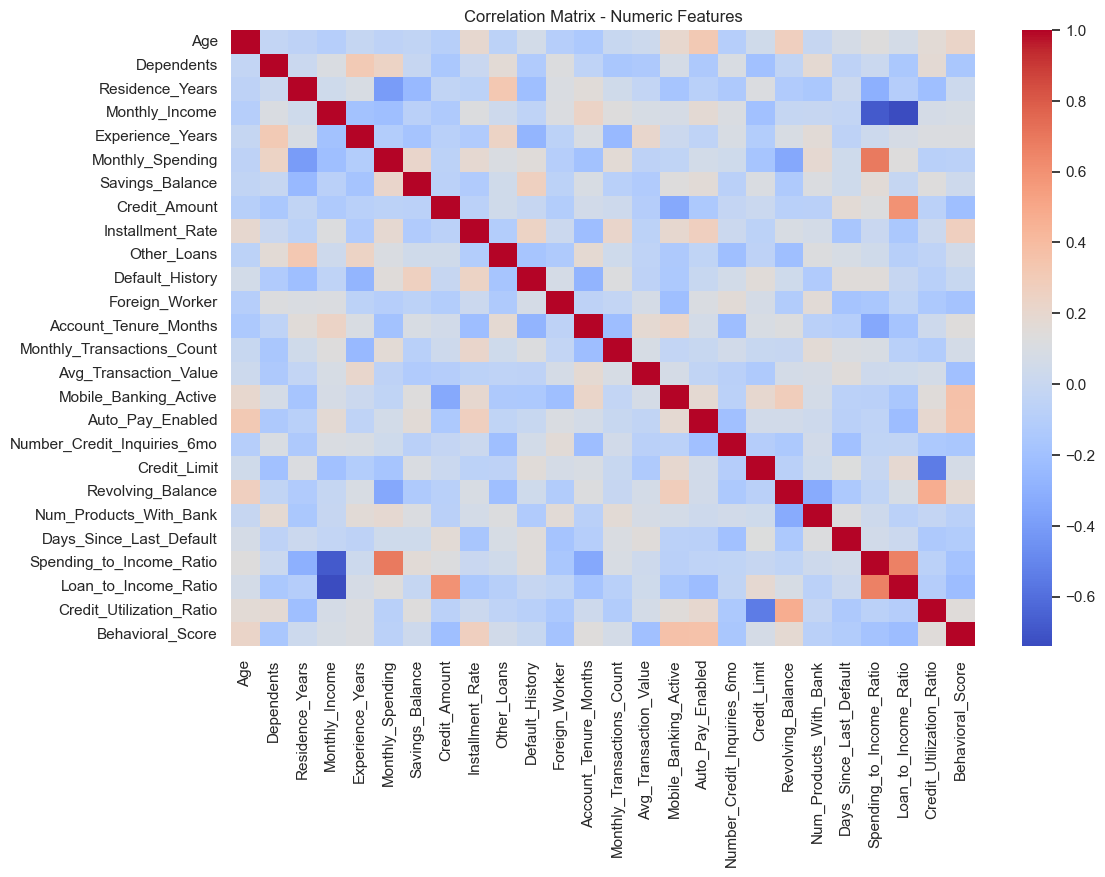

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix - Numeric Features")
plt.show()

# Distribution Of Numeric Columns

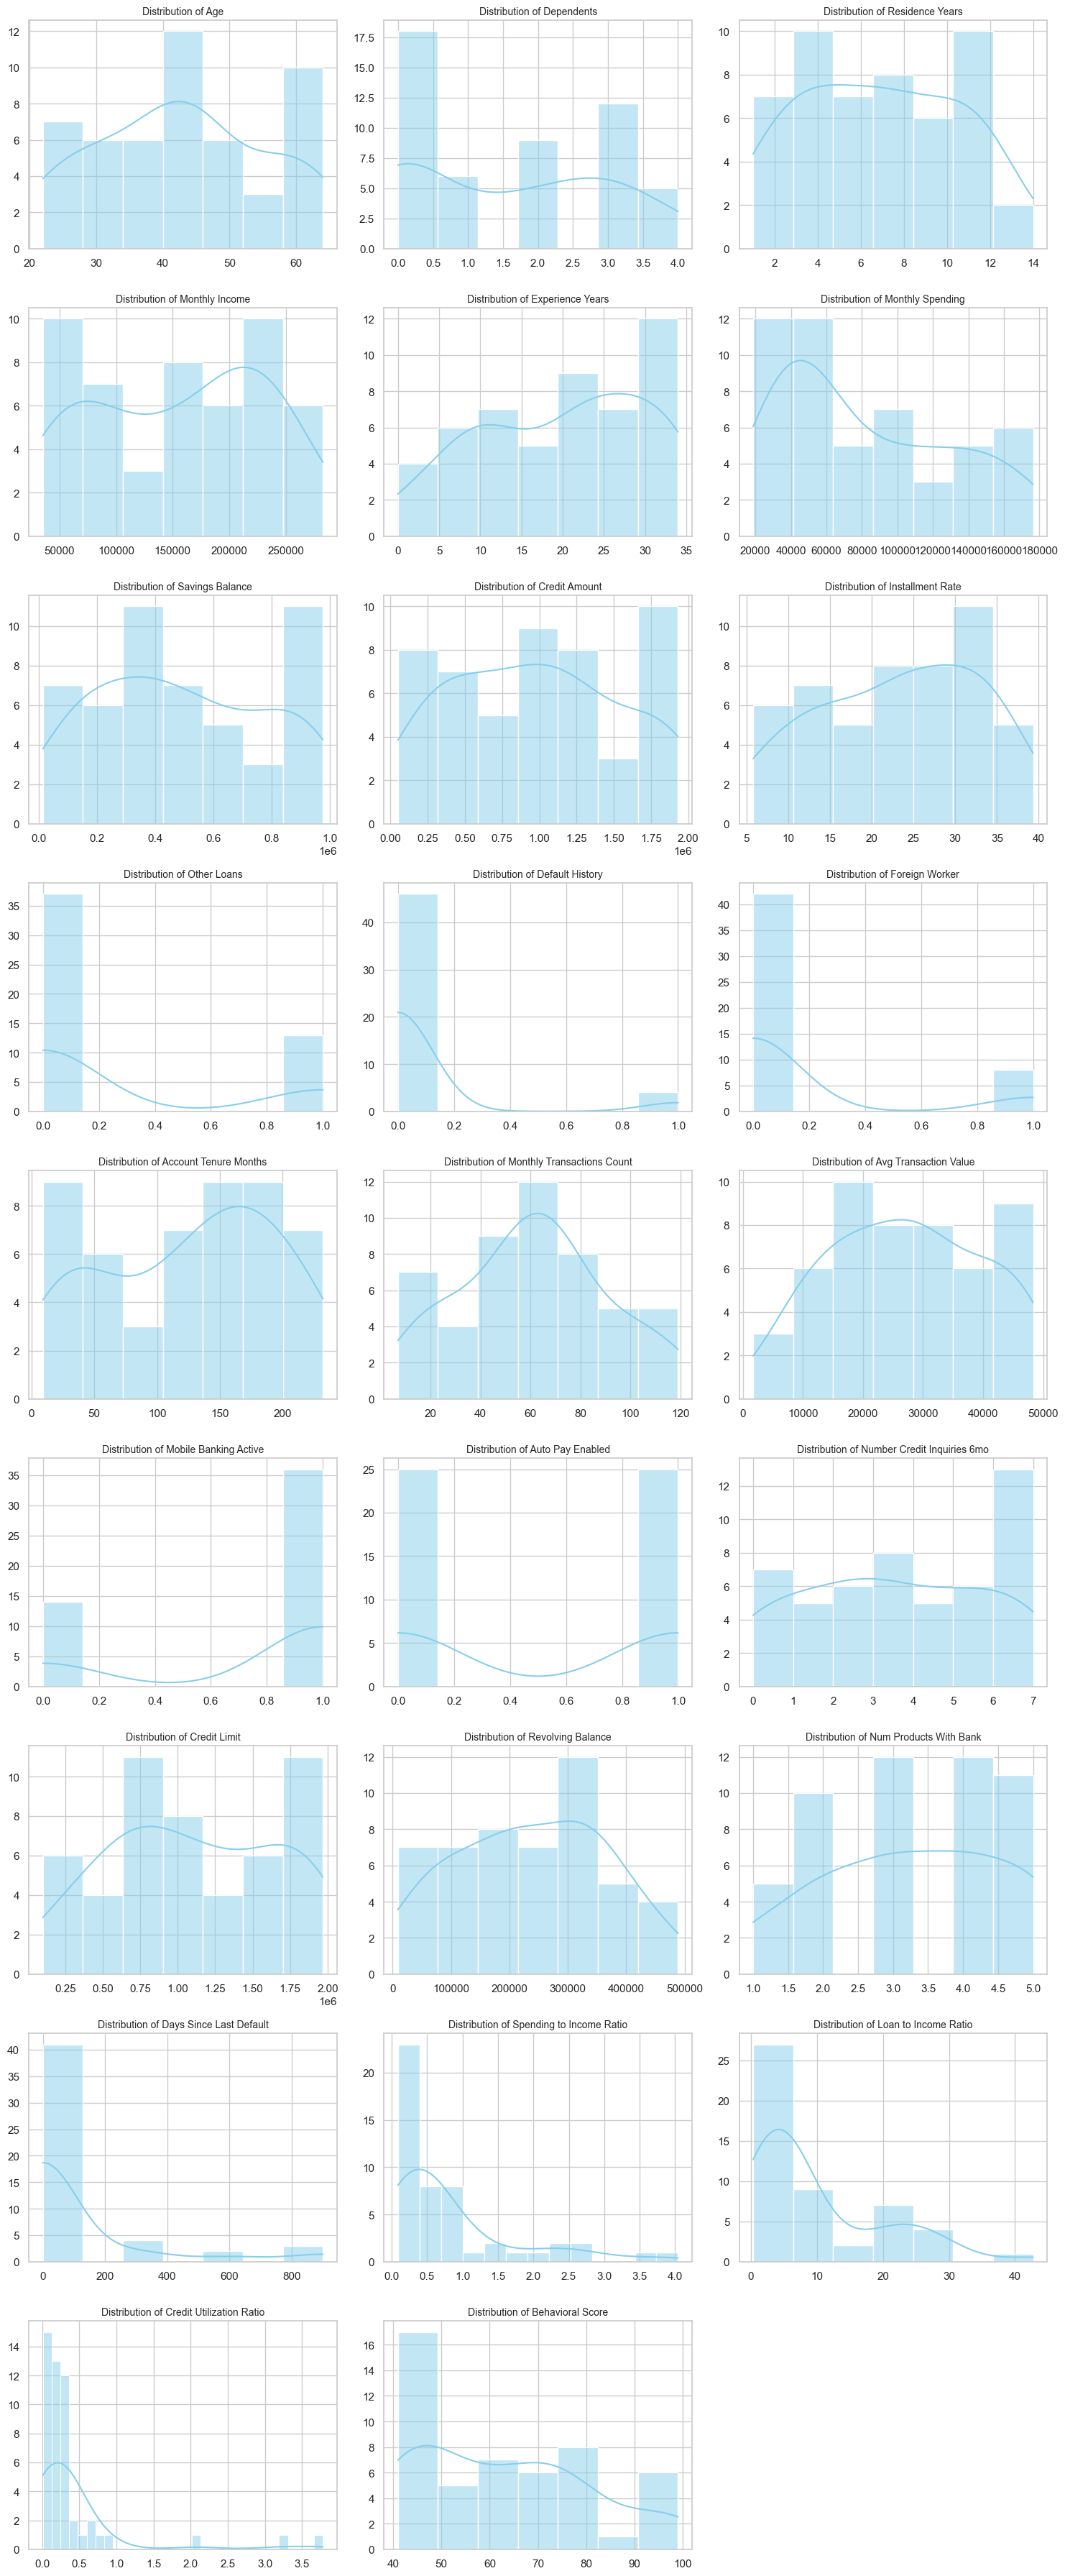

In [53]:
import math
num_features = bank.select_dtypes(include=np.number).columns
num_features = [col for col in num_features if col in bank.columns]

n_col = 3
n_row = math.ceil(len(num_features)/n_col)

fig, axes = plt.subplots(n_row, n_col, figsize=(15, n_row*4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(bank[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col.replace("_", " ")}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide empty subplots
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Relationship With Targe Variable

In [55]:
target = "Credit_Risk"

# Box Plot For Continious Features

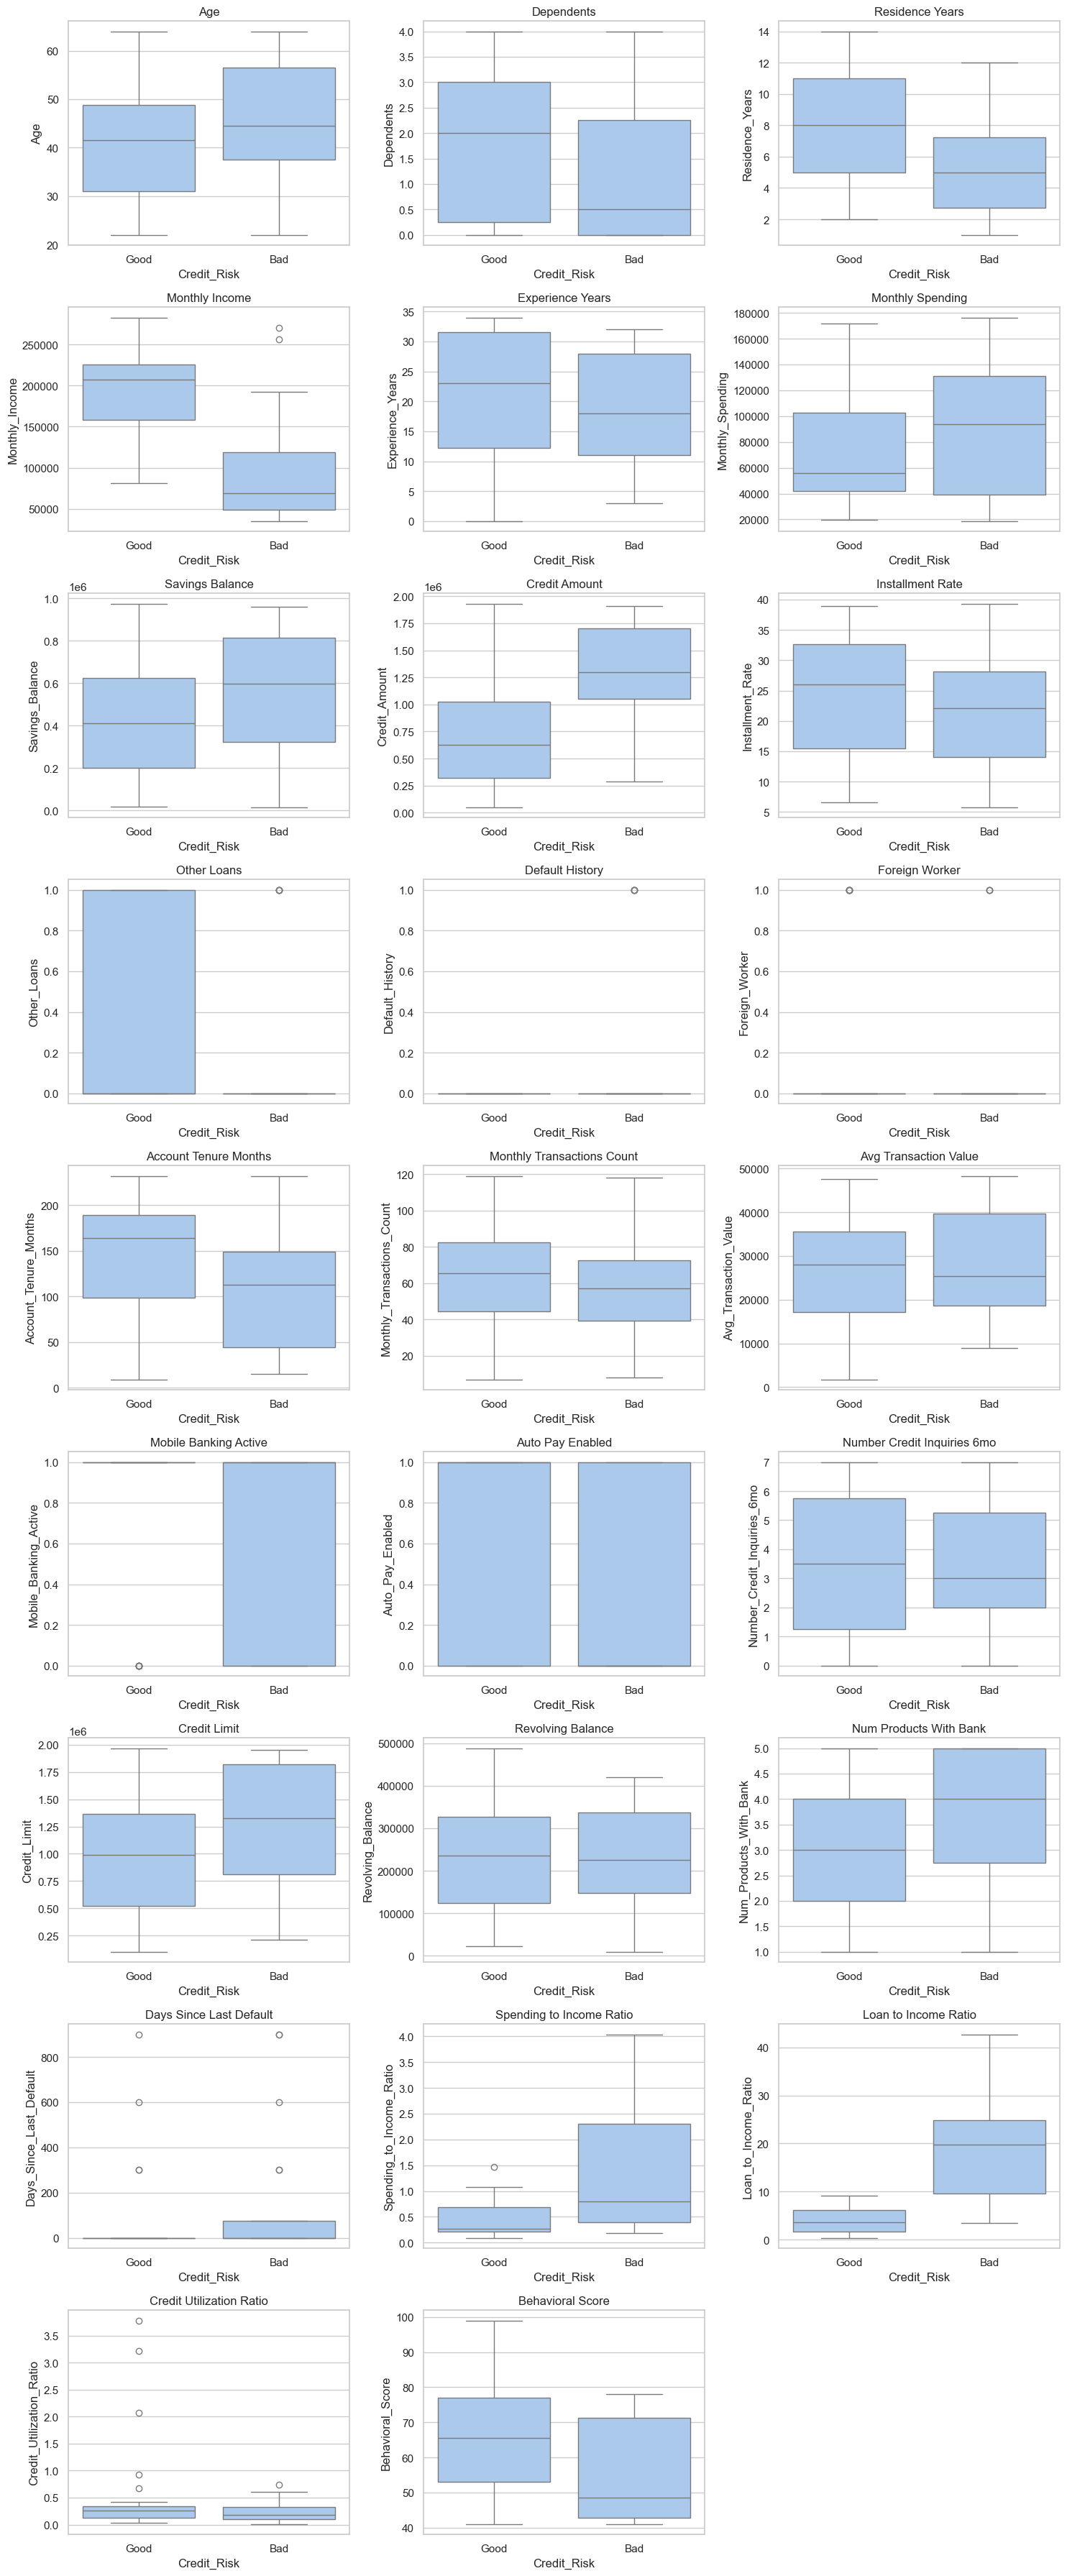

In [57]:
import math
num_features = [col for col in num_features if col in bank.columns]

n_cols = 3
n_rows = math.ceil(len(num_features)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()


for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, data=bank, ax=axes[i])
        axes[i].set_title(f"{col.replace("_", " ")}")

# Remove unused axes

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [58]:
bank.describe()

,Age,Dependents,Residence_Years,Monthly_Income,Experience_Years,Monthly_Spending,Savings_Balance,Credit_Amount,Installment_Rate,Other_Loans,Default_History,Foreign_Worker,Account_Tenure_Months,Monthly_Transactions_Count,Avg_Transaction_Value,Mobile_Banking_Active,Auto_Pay_Enabled,Number_Credit_Inquiries_6mo,Credit_Limit,Revolving_Balance,Num_Products_With_Bank,Days_Since_Last_Default,Spending_to_Income_Ratio,Loan_to_Income_Ratio,Credit_Utilization_Ratio,Behavioral_Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,42.760000,1.600000,6.860000,156267.660000,20.020000,82568.760000,492118.040000,9.842007e+05,23.247200,0.260000,0.080000,0.160000,125.960000,61.340000,27342.200000,0.720000,0.500000,3.520000,1.107963e+06,237467.020000,3.280000,102.000000,0.830400,9.873000,0.41000,63.100000
std,12.846917,1.442786,3.692298,76860.582136,10.284702,48550.157614,294786.752217,5.738256e+05,9.683163,0.443087,0.274048,0.370328,69.805257,29.794267,12813.730423,0.453557,0.505076,2.349468,5.640320e+05,129089.815602,1.294257,247.014831,0.920816,10.027892,0.71406,18.227866
min,22.000000,0.000000,1.000000,35237.000000,0.000000,18709.000000,14337.000000,5.040400e+04,5.780000,0.000000,0.000000,0.000000,9.000000,7.000000,1726.000000,0.000000,0.000000,0.000000,1.011950e+05,9078.000000,1.000000,0.000000,0.090000,0.350000,0.01000,41.000000
25%,32.500000,0.000000,4.000000,83768.500000,11.000000,41833.000000,270936.250000,5.171688e+05,14.822500,0.000000,0.000000,0.000000,61.750000,41.500000,18390.500000,0.000000,0.000000,2.000000,6.710062e+05,125642.000000,2.000000,0.000000,0.242500,2.692500,0.12000,46.250000
50%,42.500000,2.000000,7.000000,166646.000000,22.000000,67376.000000,473111.500000,9.715105e+05,24.290000,0.000000,0.000000,0.000000,134.500000,63.000000,27051.500000,1.000000,0.500000,3.000000,1.096313e+06,232461.500000,3.000000,0.000000,0.450000,6.000000,0.23000,61.500000
75%,52.250000,3.000000,10.000000,221101.500000,28.750000,126382.000000,723910.750000,1.406338e+06,31.807500,0.750000,0.000000,0.000000,175.750000,76.750000,37757.500000,1.000000,1.000000,5.750000,1.630082e+06,329797.000000,4.000000,0.000000,0.835000,15.672500,0.33750,75.750000
max,64.000000,4.000000,14.000000,282764.000000,34.000000,176426.000000,975240.000000,1.931548e+06,39.320000,1.000000,1.000000,1.000000,232.000000,119.000000,48319.000000,1.000000,1.000000,7.000000,1.968317e+06,488533.000000,5.000000,900.000000,4.040000,42.730000,3.78000,99.000000
